In [36]:
!sudo apt-get update
! sudo apt-get install tree

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [37]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
from datetime import datetime
import zoneinfo

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
dir_root = '/content/drive/MyDrive/266-final/'
# dir_data = '/content/drive/MyDrive/266-final/data/'
# dir_data = '/content/drive/MyDrive/266-final/data/se21-t1-comp-lex-master/'
dir_data = '/content/drive/MyDrive/266-final/data/266-comp-lex-master'
dir_models = '/content/drive/MyDrive/266-final/models/'
dir_results = '/content/drive/MyDrive/266-final/results/'
log_filename = "experiment_runs.txt"
log_filepath = os.path.join(dir_results, log_filename)

In [40]:
!tree -L 1 /content/drive/MyDrive/266-final/

/content/drive/MyDrive/266-final/
├── data
├── models
├── notebook-scripts
├── paper
├── results
└── slides

6 directories, 0 files


In [41]:
def parse_log_file(file_path):
    """
    Returns a Pandas DataFrame of parsed JSON records.
    """
    records = []
    buffer = []
    brace_depth = 0

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            brace_diff = line.count('{') - line.count('}')
            brace_depth += brace_diff

            buffer.append(line)

            if brace_depth == 0 and buffer:
                record_str = "".join(buffer).strip()

                if record_str:
                    try:
                        record = json.loads(record_str)
                        records.append(record)
                    except json.JSONDecodeError:
                        pass

                buffer = []

    df = pd.json_normalize(records)

    return df


In [42]:
log_df = parse_log_file(log_filepath)
display(log_df)

,timestamp,experiment_meta.model_name,experiment_meta.learning_rate,experiment_meta.epochs,experiment_meta.batch_size,experiment_meta.weight_decay,experiment_meta.x_task,experiment_meta.x_col,experiment_meta.y_col,experiment_meta.layers_to_unfreeze,...,model_details.config_attributes.summary_type,model_details.config_attributes.summary_use_proj,model_details.config_attributes.summary_activation,model_details.config_attributes.summary_last_dropout,model_details.config_attributes.start_n_top,model_details.config_attributes.end_n_top,model_details.config_attributes.use_mems_eval,model_details.config_attributes.use_mems_train,model_details.config_attributes.task_specific_params.text-generation.do_sample,model_details.config_attributes.task_specific_params.text-generation.max_length
0,2025-04-09T10:57:21.454889-07:00,bert-base-cased,0.000005,1,128,0.5,single,pos_sequence,binary_complexity,"[bert.encoder.layer.0., bert.encoder.layer.11....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-04-09T10:58:27.004579-07:00,bert-base-cased,0.000005,1,128,0.5,multi,pos_sequence,binary_complexity,"[bert.encoder.layer.0., bert.encoder.layer.11....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-04-09T10:59:19.669997-07:00,bert-base-cased,0.000005,1,128,0.5,single,morph_sequence,binary_complexity,"[bert.encoder.layer.0., bert.encoder.layer.11....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-04-09T11:00:14.558023-07:00,bert-base-cased,0.000005,1,128,0.5,multi,morph_sequence,binary_complexity,"[bert.encoder.layer.0., bert.encoder.layer.11....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-04-09T11:01:07.013948-07:00,bert-base-cased,0.000005,1,128,0.5,single,sentence,binary_complexity,"[bert.encoder.layer.0., bert.encoder.layer.11....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2025-04-11T09:22:08.126507-07:00,answerdotai/ModernBERT-base,0.000005,1,128,0.5,multi,snc_morph_complexity_value,binary_complexity,"[model.layers.21.attn_norm.weight, model.layer...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,2025-04-11T09:23:18.687475-07:00,answerdotai/ModernBERT-large,0.000005,1,128,0.5,multi,snc_morph_complexity_value,binary_complexity,"[model.layers.27.attn_norm.weight, model.layer...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,2025-04-11T09:24:09.162968-07:00,microsoft/deberta-v3-base,0.000005,1,128,0.5,multi,snc_morph_complexity_value,binary_complexity,[deberta.encoder.layer.11.attention.self.query...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,2025-04-11T09:25:58.961947-07:00,xlnet/xlnet-base-cased,0.000005,1,128,0.5,multi,snc_morph_complexity_value,binary_complexity,"[transformer.layer.11.rel_attn.q, transformer....",...,last,True,tanh,0.1,5.0,5.0,True,False,True,250.0


In [43]:
log_df.shape

(171, 180)

In [44]:
!tree /content/drive/MyDrive/266-final/results/

/content/drive/MyDrive/266-final/results/
├── data_engineering_qa
│   ├── sentence_no_contraction_span_analysis.csv
│   ├── sentence_span_analysis (1).csv
│   ├── sentence_span_analysis.csv
│   ├── sentence_span_analysis_no_contractions (1).csv
│   └── sentence_span_analysis_no_contractions.csv
├── experiment_results_20250411_125911.xlsx
├── experiment_results_20250411_162910.xlsx
├── experiment-results-archive
│   ├── archive2_experiment_runs.txt
│   ├── archive3_experiment_runs.txt
│   ├── archive_experiment_runs.txt
│   ├── Copy of experiment_runs.txt
│   ├── experiment_results_20250410_034821.xlsx
│   ├── experiment_results_20250410_164111.xlsx
│   ├── experiment_results_20250410_165208.xlsx
│   ├── experiment_results_20250410_223015.xlsx
│   ├── experiment_results_20250410_223135.xlsx
│   ├── experiment_results_20250410_223248.xlsx
│   ├── experiment_results_20250410_224758.xlsx
│   ├── experiment_results_20250410_232025.xlsx
│   ├── experiment_results_20250411_000318.xlsx
│   ├──

In [45]:
with open(log_filepath, 'r', encoding='utf-8') as f:
    content = f.read()
print(content)


{"timestamp": "2025-04-09T10:57:21.454889-07:00", "experiment_meta": {"model_name": "bert-base-cased", "learning_rate": 5e-06, "epochs": 1, "batch_size": 128, "weight_decay": 0.5, "x_task": "single", "x_col": "pos_sequence", "y_col": "binary_complexity", "layers_to_unfreeze": ["bert.encoder.layer.0.", "bert.encoder.layer.11.", "bert.pooler.", "classifier."]}, "model_details": {"model_total_params": 108311810, "model_trainable_params": 14767874, "pooler_activation_function": "Tanh", "config_attributes": {"return_dict": true, "output_hidden_states": false, "output_attentions": false, "torchscript": false, "torch_dtype": "float32", "use_bfloat16": false, "tf_legacy_loss": false, "pruned_heads": {}, "tie_word_embeddings": true, "chunk_size_feed_forward": 0, "is_encoder_decoder": false, "is_decoder": false, "cross_attention_hidden_size": null, "add_cross_attention": false, "tie_encoder_decoder": false, "max_length": 20, "min_length": 0, "do_sample": false, "early_stopping": false, "num_beam

In [46]:
print(log_df.columns)

Index(['timestamp', 'experiment_meta.model_name',
       'experiment_meta.learning_rate', 'experiment_meta.epochs',
       'experiment_meta.batch_size', 'experiment_meta.weight_decay',
       'experiment_meta.x_task', 'experiment_meta.x_col',
       'experiment_meta.y_col', 'experiment_meta.layers_to_unfreeze',
       ...
       'model_details.config_attributes.summary_type',
       'model_details.config_attributes.summary_use_proj',
       'model_details.config_attributes.summary_activation',
       'model_details.config_attributes.summary_last_dropout',
       'model_details.config_attributes.start_n_top',
       'model_details.config_attributes.end_n_top',
       'model_details.config_attributes.use_mems_eval',
       'model_details.config_attributes.use_mems_train',
       'model_details.config_attributes.task_specific_params.text-generation.do_sample',
       'model_details.config_attributes.task_specific_params.text-generation.max_length'],
      dtype='object', length=180)


In [47]:
# prompt: THIS OUTPUT IS TRUNCATING THE COLUMN, WRITE THE COLUMSN TO A LIST AND THEN PRINT THAT LIST

column_list = log_df.columns.tolist()
column_list


['timestamp',
 'experiment_meta.model_name',
 'experiment_meta.learning_rate',
 'experiment_meta.epochs',
 'experiment_meta.batch_size',
 'experiment_meta.weight_decay',
 'experiment_meta.x_task',
 'experiment_meta.x_col',
 'experiment_meta.y_col',
 'experiment_meta.layers_to_unfreeze',
 'model_details.model_total_params',
 'model_details.model_trainable_params',
 'model_details.pooler_activation_function',
 'model_details.config_attributes.return_dict',
 'model_details.config_attributes.output_hidden_states',
 'model_details.config_attributes.output_attentions',
 'model_details.config_attributes.torchscript',
 'model_details.config_attributes.torch_dtype',
 'model_details.config_attributes.use_bfloat16',
 'model_details.config_attributes.tf_legacy_loss',
 'model_details.config_attributes.tie_word_embeddings',
 'model_details.config_attributes.chunk_size_feed_forward',
 'model_details.config_attributes.is_encoder_decoder',
 'model_details.config_attributes.is_decoder',
 'model_details.

In [48]:
def display_experiment_metrics(log_df):
    base_columns = [
        'timestamp',
        'experiment_meta.model_name',
        'experiment_meta.x_task',
        'experiment_meta.x_col',
        # 'model_lineage.type',
        # 'model_lineage.path',
        # 'model_lineage.timestamp',
        # 'model_details.config_attributes._name_or_path',
        # 'model_details.config_attributes.classifier_dropout',
        'model_details.config_attributes.attention_probs_dropout_prob',
        'model_details.config_attributes.hidden_dropout_prob',
        'model_details.config_attributes.num_hidden_layers',
        'model_details.model_total_params',
        'model_details.model_trainable_params',
        'experiment_meta.model_name',
        'experiment_meta.learning_rate',
        'experiment_meta.epochs',
        'experiment_meta.batch_size',
        'experiment_meta.weight_decay',
        'experiment_meta.x_task',
        'experiment_meta.x_col',
        'experiment_meta.y_col',
        'experiment_meta.layers_to_unfreeze',

    ]

    metrics = [
        'run_metrics.train_eval_loss',
        'run_metrics.train_eval_accuracy',
        'run_metrics.train_eval_precision',
        'run_metrics.train_eval_recall',
        'run_metrics.train_eval_f1',
        'run_metrics.train_eval_runtime',
        # 'run_metrics.train_eval_samples_per_second',
        # 'run_metrics.train_eval_steps_per_second',
        'run_metrics.train_epoch',
        'run_metrics.val_eval_loss',
        'run_metrics.val_eval_accuracy',
        'run_metrics.val_eval_precision',
        'run_metrics.val_eval_recall',
        'run_metrics.val_eval_f1',
        'run_metrics.val_eval_runtime',
        # 'run_metrics.val_eval_samples_per_second',
        # 'run_metrics.val_eval_steps_per_second',
        # 'run_metrics.val_epoch',
        'run_metrics.test_eval_loss',
        'run_metrics.test_eval_accuracy',
        'run_metrics.test_eval_precision',
        'run_metrics.test_eval_recall',
        'run_metrics.test_eval_f1',
        'run_metrics.test_eval_runtime',
        # 'run_metrics.test_eval_samples_per_second',
        # 'run_metrics.test_eval_steps_per_second',
        # 'run_metrics.test_epoch'
    ]

    desired_columns = base_columns + metrics

    display_df = log_df.reindex(columns=desired_columns)

    return display_df

result_df = display_experiment_metrics(log_df)
display(result_df)


,timestamp,experiment_meta.model_name,experiment_meta.x_task,experiment_meta.x_col,model_details.config_attributes.attention_probs_dropout_prob,model_details.config_attributes.hidden_dropout_prob,model_details.config_attributes.num_hidden_layers,model_details.model_total_params,model_details.model_trainable_params,experiment_meta.model_name,...,run_metrics.val_eval_precision,run_metrics.val_eval_recall,run_metrics.val_eval_f1,run_metrics.val_eval_runtime,run_metrics.test_eval_loss,run_metrics.test_eval_accuracy,run_metrics.test_eval_precision,run_metrics.test_eval_recall,run_metrics.test_eval_f1,run_metrics.test_eval_runtime
0,2025-04-09T10:57:21.454889-07:00,bert-base-cased,single,pos_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.492401,0.843750,0.621881,2.1541,0.690998,0.520174,0.500726,0.782313,0.610619,2.6416
1,2025-04-09T10:58:27.004579-07:00,bert-base-cased,multi,pos_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.548387,0.442708,0.489914,3.1760,0.686096,0.556161,0.555921,0.383220,0.453691,4.7886
2,2025-04-09T10:59:19.669997-07:00,bert-base-cased,single,morph_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.456057,1.000000,0.626427,2.1856,0.714042,0.480916,0.480916,1.000000,0.649485,2.8863
3,2025-04-09T11:00:14.558023-07:00,bert-base-cased,multi,morph_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.456057,1.000000,0.626427,2.3915,0.714042,0.480916,0.480916,1.000000,0.649485,3.0385
4,2025-04-09T11:01:07.013948-07:00,bert-base-cased,single,sentence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.456057,1.000000,0.626427,3.2155,0.714042,0.480916,0.480916,1.000000,0.649485,3.9224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2025-04-11T09:22:08.126507-07:00,answerdotai/ModernBERT-base,multi,snc_morph_complexity_value,NaN,NaN,22.0,149606402,5607938,answerdotai/ModernBERT-base,...,0.515152,1.000000,0.680000,5.1719,2.065046,0.538043,0.538043,1.000000,0.699647,5.3810
167,2025-04-11T09:23:18.687475-07:00,answerdotai/ModernBERT-large,multi,snc_morph_complexity_value,NaN,NaN,28.0,395833346,13309954,answerdotai/ModernBERT-large,...,0.531915,0.980392,0.689655,5.3536,0.782310,0.521739,0.532164,0.919192,0.674074,5.9642
168,2025-04-11T09:24:09.162968-07:00,microsoft/deberta-v3-base,multi,snc_morph_complexity_value,0.1,0.1,12.0,184423682,8074754,microsoft/deberta-v3-base,...,0.714286,0.196078,0.307692,5.3719,0.709277,0.418478,0.366667,0.111111,0.170543,5.2695
169,2025-04-11T09:25:58.961947-07:00,xlnet/xlnet-base-cased,multi,snc_morph_complexity_value,NaN,NaN,NaN,117310466,8270594,xlnet/xlnet-base-cased,...,0.515152,1.000000,0.680000,5.3723,0.724874,0.538043,0.538043,1.000000,0.699647,5.7066


In [49]:
# export as xlsx excel file

result_df = display_experiment_metrics(log_df)
display(result_df)

# Create the results directory if it doesn't exist
os.makedirs(dir_results, exist_ok=True)

# Generate timestamp for filename

pacific_time = datetime.now(zoneinfo.ZoneInfo("America/Los_Angeles"))
timestamp = pacific_time.isoformat()
filename = f"experiment_results_{timestamp}.xlsx"
filepath = os.path.join(dir_results, filename)

# Export the DataFrame to an Excel file
result_df.to_excel(filepath, index=False)

print(f"Results exported to: {filepath}")


,timestamp,experiment_meta.model_name,experiment_meta.x_task,experiment_meta.x_col,model_details.config_attributes.attention_probs_dropout_prob,model_details.config_attributes.hidden_dropout_prob,model_details.config_attributes.num_hidden_layers,model_details.model_total_params,model_details.model_trainable_params,experiment_meta.model_name,...,run_metrics.val_eval_precision,run_metrics.val_eval_recall,run_metrics.val_eval_f1,run_metrics.val_eval_runtime,run_metrics.test_eval_loss,run_metrics.test_eval_accuracy,run_metrics.test_eval_precision,run_metrics.test_eval_recall,run_metrics.test_eval_f1,run_metrics.test_eval_runtime
0,2025-04-09T10:57:21.454889-07:00,bert-base-cased,single,pos_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.492401,0.843750,0.621881,2.1541,0.690998,0.520174,0.500726,0.782313,0.610619,2.6416
1,2025-04-09T10:58:27.004579-07:00,bert-base-cased,multi,pos_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.548387,0.442708,0.489914,3.1760,0.686096,0.556161,0.555921,0.383220,0.453691,4.7886
2,2025-04-09T10:59:19.669997-07:00,bert-base-cased,single,morph_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.456057,1.000000,0.626427,2.1856,0.714042,0.480916,0.480916,1.000000,0.649485,2.8863
3,2025-04-09T11:00:14.558023-07:00,bert-base-cased,multi,morph_sequence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.456057,1.000000,0.626427,2.3915,0.714042,0.480916,0.480916,1.000000,0.649485,3.0385
4,2025-04-09T11:01:07.013948-07:00,bert-base-cased,single,sentence,0.1,0.1,12.0,108311810,14767874,bert-base-cased,...,0.456057,1.000000,0.626427,3.2155,0.714042,0.480916,0.480916,1.000000,0.649485,3.9224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2025-04-11T09:22:08.126507-07:00,answerdotai/ModernBERT-base,multi,snc_morph_complexity_value,NaN,NaN,22.0,149606402,5607938,answerdotai/ModernBERT-base,...,0.515152,1.000000,0.680000,5.1719,2.065046,0.538043,0.538043,1.000000,0.699647,5.3810
167,2025-04-11T09:23:18.687475-07:00,answerdotai/ModernBERT-large,multi,snc_morph_complexity_value,NaN,NaN,28.0,395833346,13309954,answerdotai/ModernBERT-large,...,0.531915,0.980392,0.689655,5.3536,0.782310,0.521739,0.532164,0.919192,0.674074,5.9642
168,2025-04-11T09:24:09.162968-07:00,microsoft/deberta-v3-base,multi,snc_morph_complexity_value,0.1,0.1,12.0,184423682,8074754,microsoft/deberta-v3-base,...,0.714286,0.196078,0.307692,5.3719,0.709277,0.418478,0.366667,0.111111,0.170543,5.2695
169,2025-04-11T09:25:58.961947-07:00,xlnet/xlnet-base-cased,multi,snc_morph_complexity_value,NaN,NaN,NaN,117310466,8270594,xlnet/xlnet-base-cased,...,0.515152,1.000000,0.680000,5.3723,0.724874,0.538043,0.538043,1.000000,0.699647,5.7066


Results exported to: /content/drive/MyDrive/266-final/results/experiment_results_2025-04-11T09:40:45.673867-07:00.xlsx


In [50]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 37 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   timestamp                                                     171 non-null    object 
 1   experiment_meta.model_name                                    171 non-null    object 
 2   experiment_meta.x_task                                        171 non-null    object 
 3   experiment_meta.x_col                                         171 non-null    object 
 4   model_details.config_attributes.attention_probs_dropout_prob  121 non-null    float64
 5   model_details.config_attributes.hidden_dropout_prob           121 non-null    float64
 6   model_details.config_attributes.num_hidden_layers             150 non-null    float64
 7   model_details.model_total_params                              171 non-n

model_details.config_attributes.attention_probs_dropout_prob         NaN
model_details.config_attributes.hidden_dropout_prob                  NaN
model_details.config_attributes.num_hidden_layers              -0.081775
model_details.model_total_params                               -0.158050
model_details.model_trainable_params                            0.203937
experiment_meta.learning_rate                                   0.165399
experiment_meta.epochs                                          0.173588
experiment_meta.batch_size                                     -0.251113
experiment_meta.weight_decay                                   -0.248785
run_metrics.train_eval_loss                                     0.047033
run_metrics.train_eval_accuracy                                 0.012877
run_metrics.train_eval_precision                                0.496929
run_metrics.train_eval_recall                                   0.907927
run_metrics.train_eval_f1                          

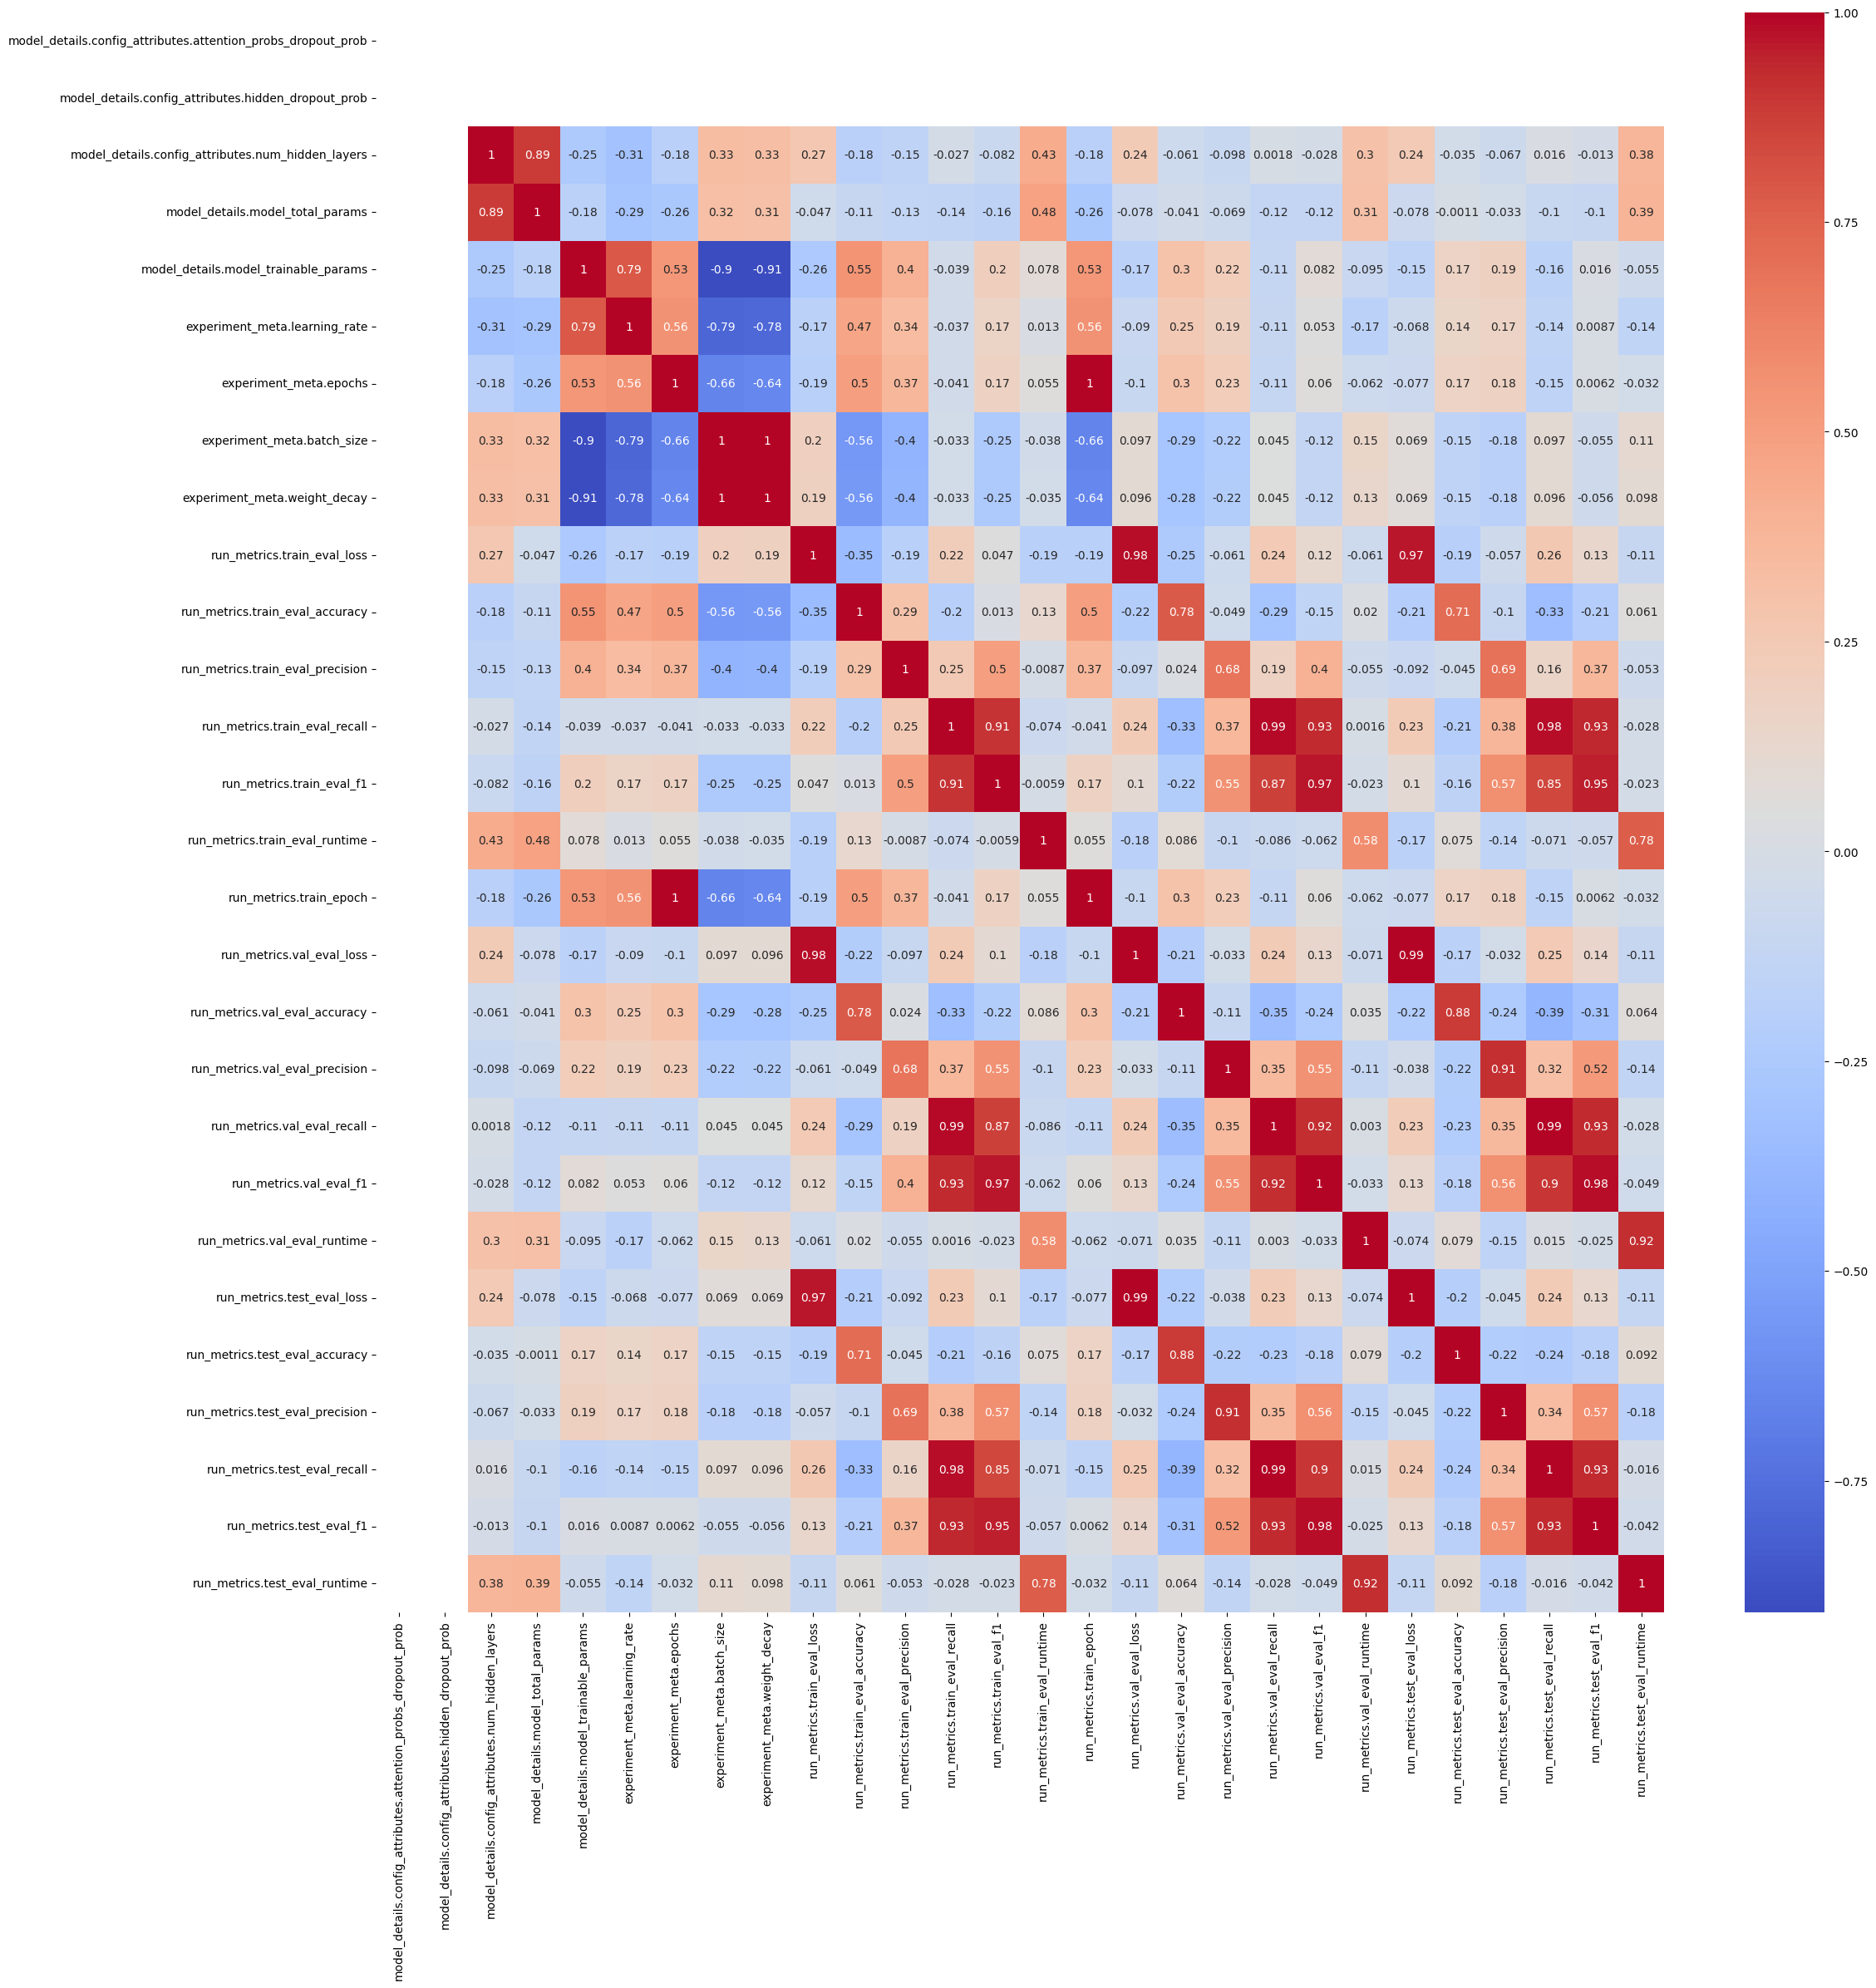

In [59]:
# Select only float columns and 'train_eval_f1'
numerical_features = result_df.select_dtypes(include=['number'])

# if test_eval_f1 is not numerical for some reason convert to it.
if not pd.api.types.is_numeric_dtype(numerical_features['run_metrics.train_eval_f1']):
  numerical_features['run_metrics.train_eval_f1'] = pd.to_numeric(numerical_features['run_metrics.train_eval_f1'],errors='coerce')

# Calculate correlations with 'train_eval_f1'
correlations = numerical_features.corr()['run_metrics.train_eval_f1']

# Print or display the correlations
print(correlations)
plt.figure(figsize=(25, 25))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.show()

model_details.config_attributes.attention_probs_dropout_prob         NaN
model_details.config_attributes.hidden_dropout_prob                  NaN
model_details.config_attributes.num_hidden_layers              -0.027619
model_details.model_total_params                               -0.123386
model_details.model_trainable_params                            0.082481
experiment_meta.learning_rate                                   0.053396
experiment_meta.epochs                                          0.059576
experiment_meta.batch_size                                     -0.124180
experiment_meta.weight_decay                                   -0.122974
run_metrics.train_eval_loss                                     0.118573
run_metrics.train_eval_accuracy                                -0.145543
run_metrics.train_eval_precision                                0.401203
run_metrics.train_eval_recall                                   0.927987
run_metrics.train_eval_f1                          

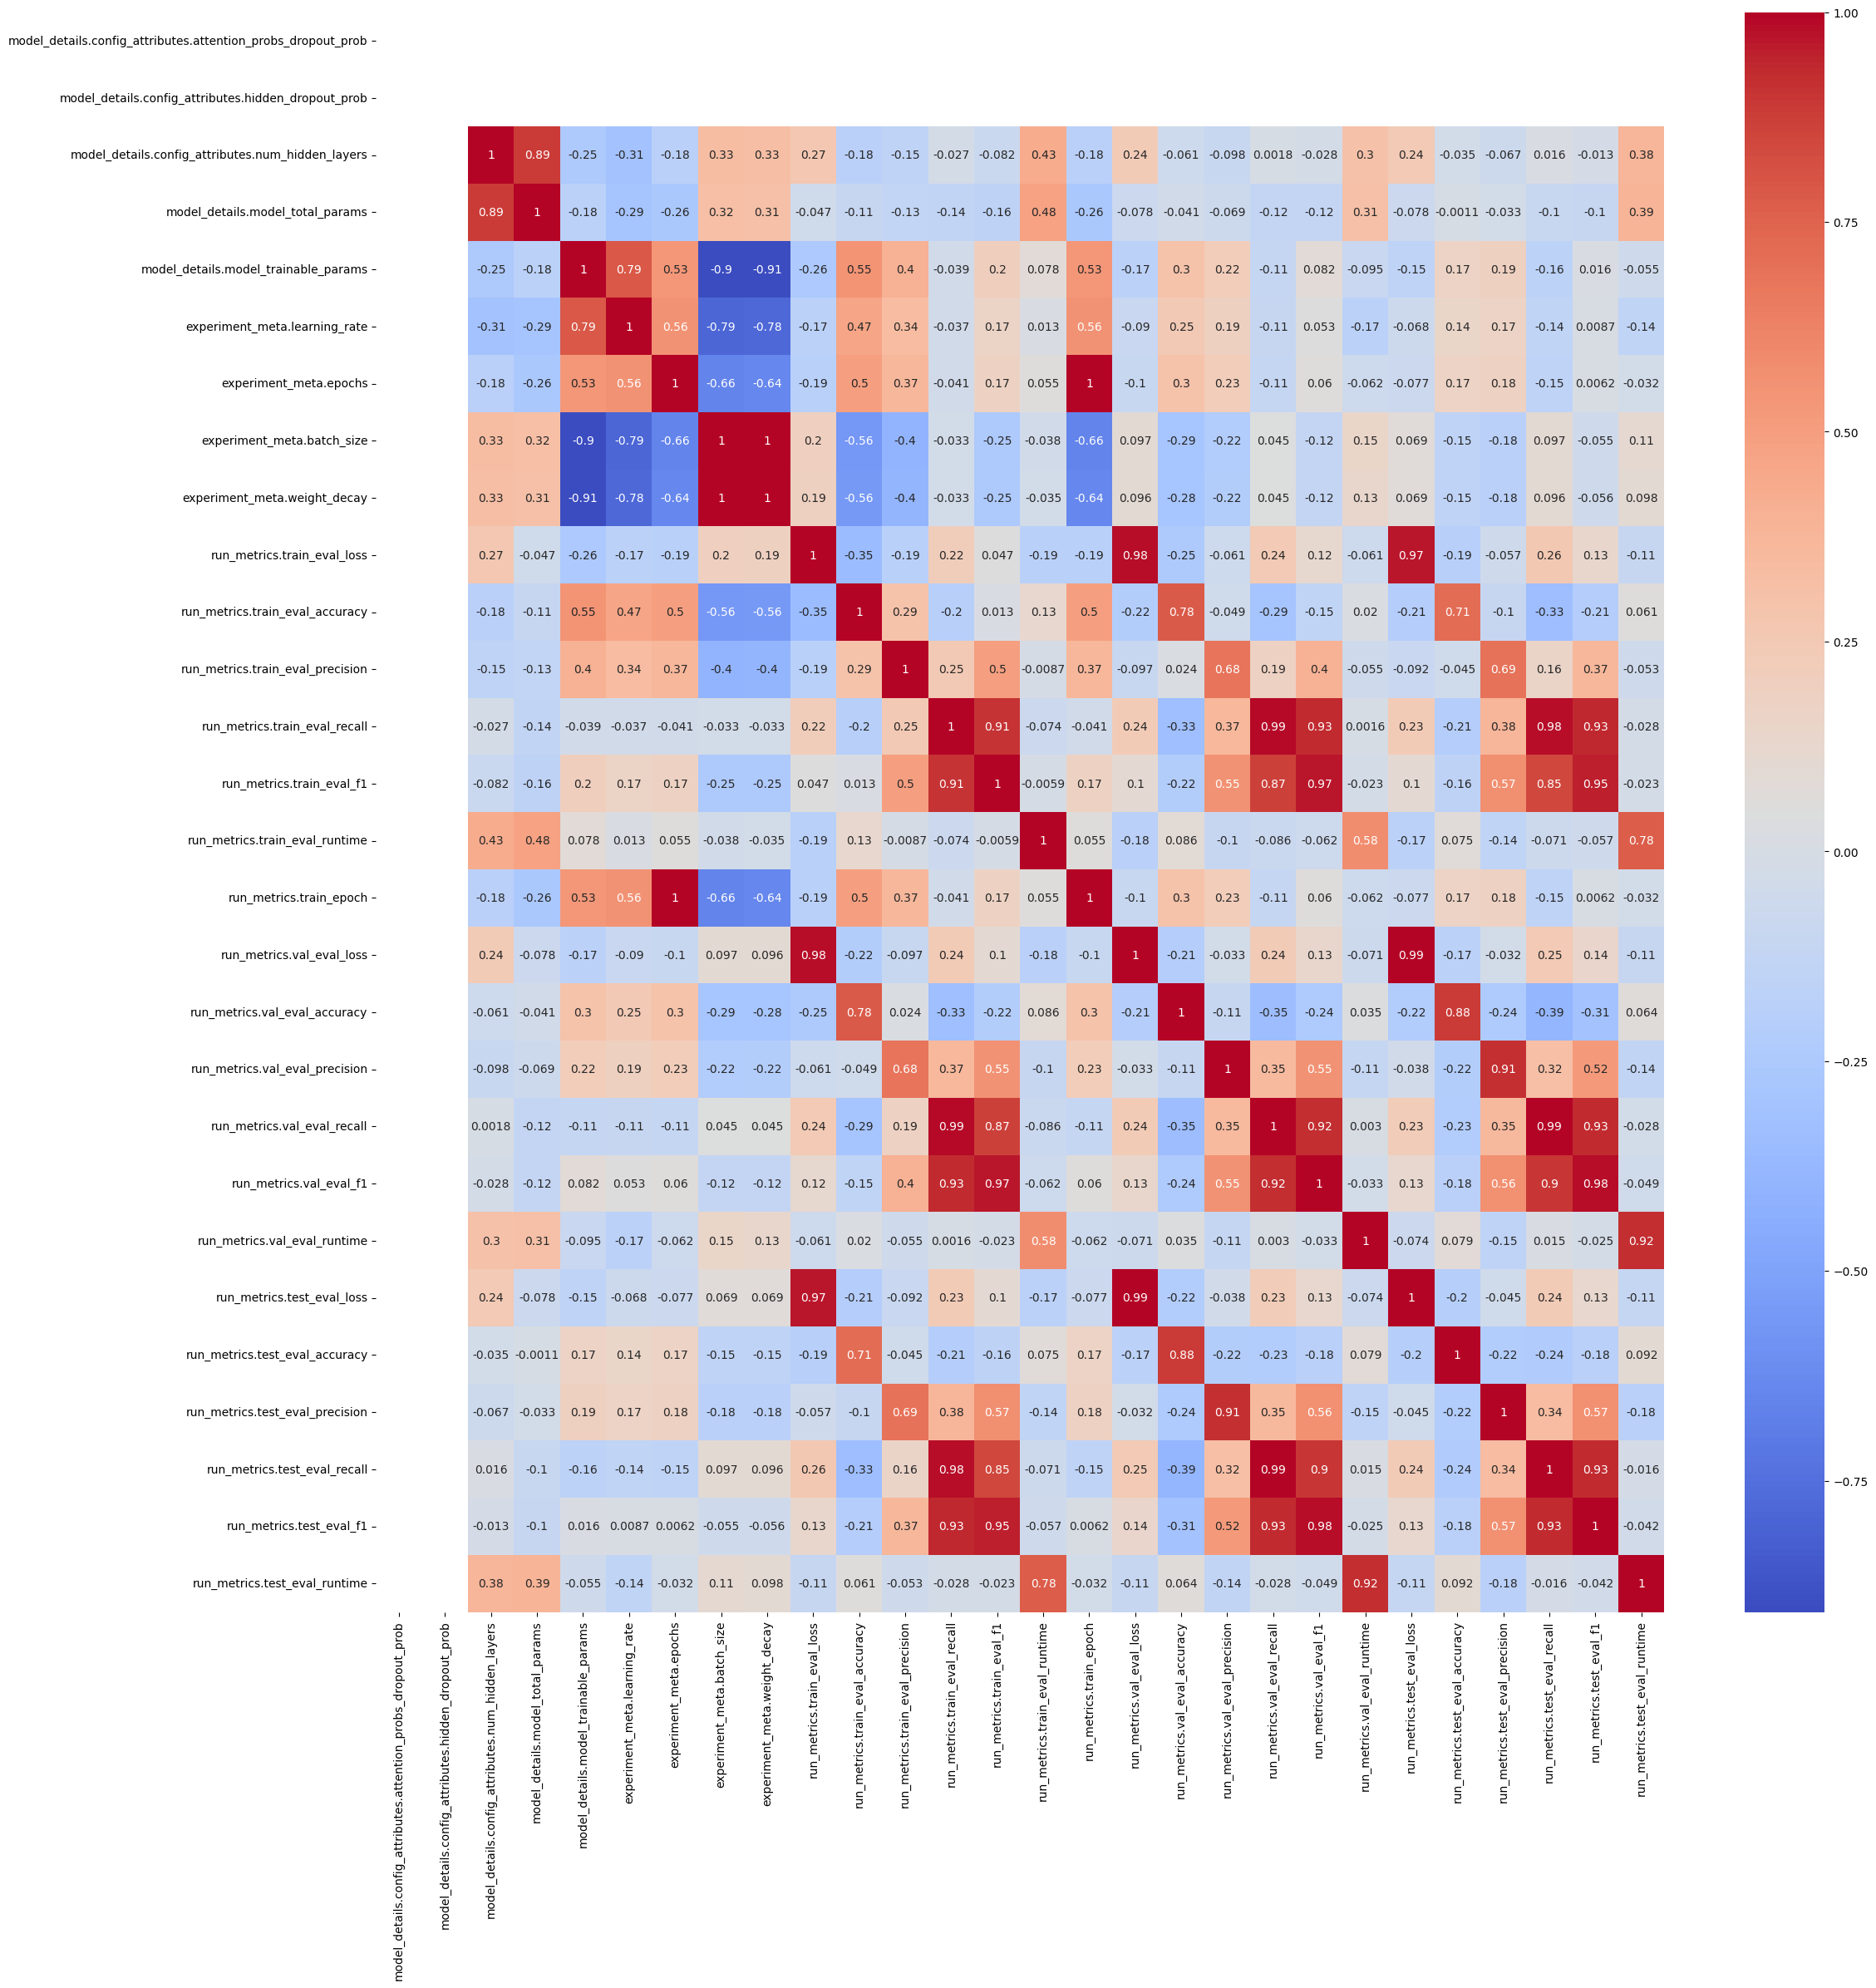

In [58]:
# Select only float columns and 'val_eval_f1'
numerical_features = result_df.select_dtypes(include=['number'])

# if test_eval_f1 is not numerical for some reason convert to it.
if not pd.api.types.is_numeric_dtype(numerical_features['run_metrics.val_eval_f1']):
  numerical_features['run_metrics.val_eval_f1'] = pd.to_numeric(numerical_features['run_metrics.val_eval_f1'],errors='coerce')

# Calculate correlations with 'val_eval_f1'
correlations = numerical_features.corr()['run_metrics.val_eval_f1']

# Print or display the correlations
print(correlations)
plt.figure(figsize=(25, 25))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.show()

In [53]:
import pandas as pd

# Select only float columns and 'test_eval_f1'
numerical_features = result_df.select_dtypes(include=['number'])

# if test_eval_f1 is not numerical for some reason convert to it.
if not pd.api.types.is_numeric_dtype(numerical_features['run_metrics.test_eval_f1']):
  numerical_features['run_metrics.test_eval_f1'] = pd.to_numeric(numerical_features['run_metrics.test_eval_f1'],errors='coerce')

# Calculate correlations with 'test_eval_f1'
correlations = numerical_features.corr()['run_metrics.test_eval_f1']

# Print or display the correlations
print(correlations)

model_details.config_attributes.attention_probs_dropout_prob         NaN
model_details.config_attributes.hidden_dropout_prob                  NaN
model_details.config_attributes.num_hidden_layers              -0.012896
model_details.model_total_params                               -0.102903
model_details.model_trainable_params                            0.016259
experiment_meta.learning_rate                                   0.008693
experiment_meta.epochs                                          0.006206
experiment_meta.batch_size                                     -0.055484
experiment_meta.weight_decay                                   -0.055998
run_metrics.train_eval_loss                                     0.133700
run_metrics.train_eval_accuracy                                -0.207007
run_metrics.train_eval_precision                                0.367563
run_metrics.train_eval_recall                                   0.933633
run_metrics.train_eval_f1                          

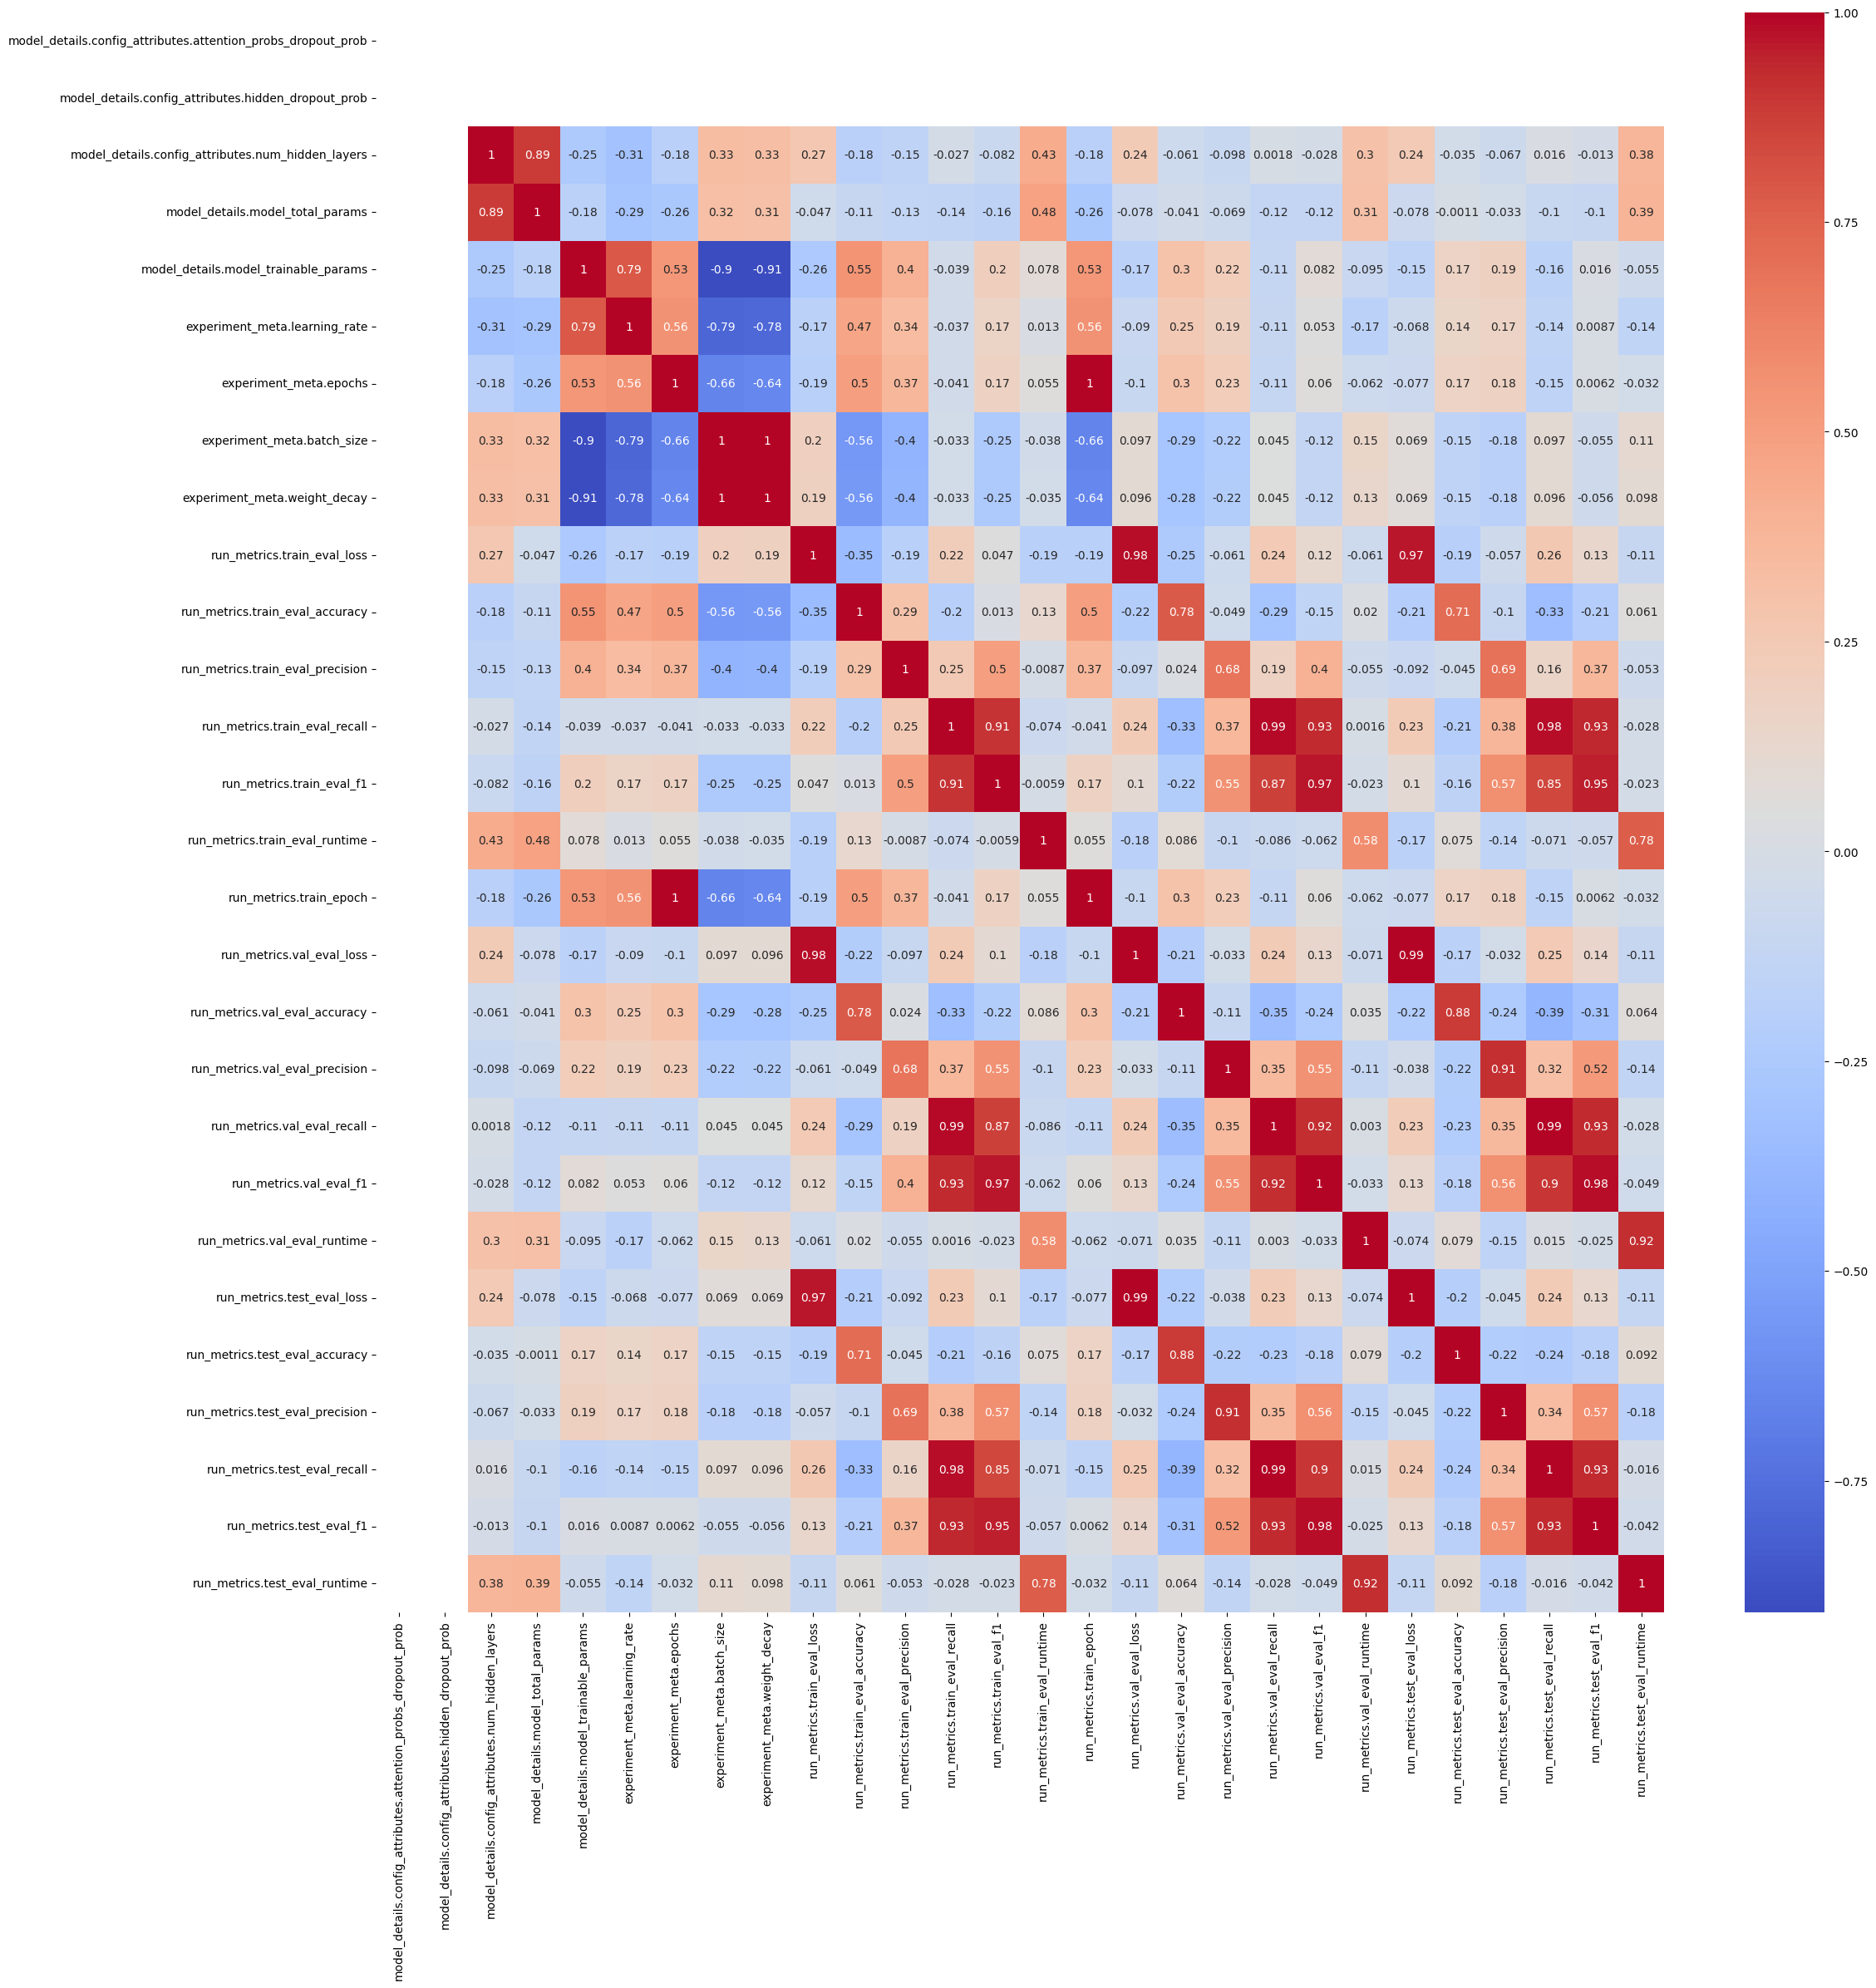

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.show()

In [55]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 180 entries, timestamp to model_details.config_attributes.task_specific_params.text-generation.max_length
dtypes: bool(17), float64(82), int64(17), object(64)
memory usage: 220.7+ KB
